# lab 1

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = np.zeros((10, 5, 4), dtype=int)

digits = [
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [1, 0, 0, 1],
        [1, 0, 0, 1],
        [0, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0],
        [0, 0, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [1, 1, 1, 1]
    ]),
    np.array([
        [1, 1, 1, 0],
        [0, 0, 0, 1],
        [0, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 1, 1, 0]
    ]),
    np.array([
        [0, 0, 1, 0],
        [0, 1, 1, 0],
        [1, 0, 1, 0],
        [1, 1, 1, 1],
        [0, 0, 1, 0]
    ]),
    np.array([
        [1, 1, 1, 1],
        [1, 0, 0, 0],
        [1, 1, 1, 0],
        [0, 0, 0, 1],
        [1, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 0],
        [1, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0]
    ]),
    np.array([
        [1, 1, 1, 1],
        [0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 1, 0, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 0]
    ]),
    np.array([
        [0, 1, 1, 0],
        [1, 0, 0, 1],
        [0, 1, 1, 1],
        [0, 0, 0, 1],
        [0, 1, 1, 0]
    ])
]

for i in range(10):
    data[i] = digits[i]

plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(1-data[i], cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
class Perceptron:
    def __init__(self, input_size, output_size, learning_rate=0.05):
        self.input_size = input_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.weights = np.random.randn(input_size, output_size)
        self.bias = np.zeros(output_size)

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def mse_derivative(self, output, target):
        return 2*(output - target)

    def train(self, X, y, n_epochs):
        for epoch in range(n_epochs):
            for i in range(len(X)):
                x = X[i].flatten()
                target = np.zeros(self.output_size)
                target[y[i]] = 1

                output = self.sigmoid(np.dot(x, self.weights) + self.bias)
                
                error = target - output
                mae_grad = self.mse_derivative(output, target)
                adjustment = self.learning_rate * mae_grad * self.sigmoid_derivative(output)

                self.weights -= np.outer(x, adjustment)
                self.bias -= adjustment

    def predict(self, X):
        x = X.flatten()
        output = self.sigmoid(np.dot(x, self.weights) + self.bias)
        return np.argmax(output)
    
    
    def predict_proba(self, X):
        x = X.flatten()
        output = self.sigmoid(np.dot(x, self.weights) + self.bias)
        return output
    

In [ ]:
labels = np.arange(10)

input_size = 5 * 4
output_size = 10
perceptron = Perceptron(input_size, output_size)
perceptron.train(data, labels, n_epochs=2000)

for i in range(10):
    prediction = perceptron.predict(data[i])
    print(f"Предсказано: {prediction}, Метка: {labels[i]}")

1


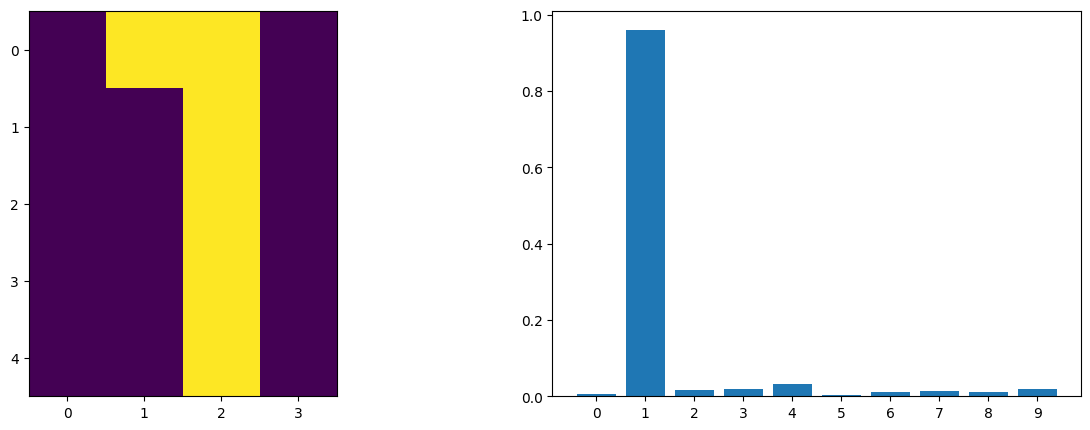

In [77]:
i = 1
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
print(perceptron.predict(data[i]))
ax[0].imshow(data[i])
ax[1].bar(np.arange(10), perceptron.predict_proba(data[i]), tick_label = np.arange(10))
fig.show()


In [ ]:
perceptron.predict_proba(data[i])

# lab 2

In [11]:
import numpy as np
from matplotlib import pyplot as plt
import torchvision
from torchvision import datasets, transforms

In [12]:
class Layer:
    def __init__(self):
        pass
    
    def forward(self, X):
        raise NotImplementedError
    
    def backward(self, dL_dy, learning_rate):
        raise NotImplementedError

In [13]:
class Linear(Layer):
    def __init__(self, input_size, output_size):
        self.w = np.random.randn(input_size, output_size) * np.sqrt(2. / input_size)
        self.b = np.zeros((1, output_size))
        
    def forward(self, X):
        self.X = X
        return X.dot(self.w) + self.b
    
    def backward(self, dL_dy, learning_rate):
        batch_size = self.X.shape[0]

        dL_dw = self.X.T.dot(dL_dy) / batch_size  # (input_size, output_size)
        dL_db = np.sum(dL_dy, axis=0, keepdims=True) / batch_size  # (1, output_size)
        
        # Вычисляем градиент по входу слоя для передачи на предыдущий слой
        dL_dX = dL_dy.dot(self.w.T)  # (batch_size, input_size)
        
        self.w -= learning_rate * dL_dw
        self.b -= learning_rate * dL_db
        
        return dL_dX

In [14]:
class ReLU(Layer):
    def forward(self, X):
        self.X = X 
        return np.maximum(0, X)
    
    def backward(self, dL_dy, learning_rate):
        dL_dX = dL_dy * (self.X > 0).astype(float)
        return dL_dX

In [15]:
class Softmax(Layer):
    def forward(self, X):
        exp_shifted = np.exp(X - np.max(X, axis=1, keepdims=True))
        self.out = exp_shifted / np.sum(exp_shifted, axis=1, keepdims=True)
        return self.out
    
    def backward(self, dL_dy, learning_rate):
        # softmax комбинируется с кросс-энтропийной потерей.
        # В этом случае градиент уже вычислен вне слоя.
        # Поэтому просто передаем градиент дальше.
        return dL_dy

In [16]:
class Model:
    def __init__(self, input_size, output_size):
        self.layers = []
        self.layers.append(Linear(input_size, 128))
        self.layers.append(ReLU())
        self.layers.append(Linear(128, 64))
        self.layers.append(ReLU())
        self.layers.append(Linear(64, output_size))
        self.layers.append(Softmax())

    def forward(self, X):
        for layer in self.layers:
            X = layer.forward(X)
        return X

    def backward(self, dL_dy, learning_rate):
        for layer in reversed(self.layers):
            dL_dy = layer.backward(dL_dy, learning_rate)

    def predict(self, X):
        predictions = self.forward(X)
        return np.argmax(predictions, axis=1)

    def predict_proba(self, X):
        return self.forward(X)

In [17]:
def cross_entropy_loss(predictions, targets):
    """
    predictions: выход модели после softmax, shape (batch_size, num_classes)
    targets: истинные метки в формате one-hot, shape (batch_size, num_classes)
    """
    epsilon = 1e-15
    predictions = np.clip(predictions, epsilon, 1. - epsilon)
    loss = -np.sum(targets * np.log(predictions)) / predictions.shape[0]
    return loss

def cross_entropy_derivative(predictions, targets):
    """
    Производная кросс-энтропии для softmax вывода.
    """
    return (predictions - targets) / predictions.shape[0]

In [18]:
class DataLoader:
    def __init__(self, X, y, batch_size, shuffle=True):
        self.X = X
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indices = np.arange(len(X))
        self.reset()

    def reset(self):
        if self.shuffle:
            np.random.shuffle(self.indices)
        self.index = 0

    def __iter__(self):
        return self

    def __next__(self):
        if self.index >= len(self.indices):
            self.reset()
            raise StopIteration

        batch_indices = self.indices[self.index:self.index + self.batch_size]
        batch_X = [self.X[i] for i in batch_indices]
        batch_y = [self.y[i] for i in batch_indices]
        self.index += self.batch_size

        return np.array(batch_X), np.array(batch_y)

In [19]:
# Загрузка данных MNIST
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_dataset_list = list(train_dataset)
test_dataset_list = list(test_dataset)

X_train = [i[0].numpy() for i in train_dataset_list]
y_train = [i[1] for i in train_dataset_list]
X_test = [i[0].numpy() for i in test_dataset_list]
y_test = [i[1] for i in test_dataset_list]

X_train_flatten = [i.reshape(-1) for i in X_train]
X_test_flatten = [i.reshape(-1) for i in X_test]

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 10636419.56it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 313480.32it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 844346.03it/s] 


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1655272.29it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [27]:
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

model = Model(input_size=784, output_size=10)

learning_rate = 0.01
epochs = 10
batch_size = 32

train_loader = DataLoader(X_train_flatten, y_train, batch_size=batch_size, shuffle=True)

losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    for batch in train_loader:
        batch_X, batch_y = batch
        batch_y_one_hot = one_hot_encode(batch_y, num_classes=10)

        predictions = model.forward(batch_X)

        loss = cross_entropy_loss(predictions, batch_y_one_hot)
        epoch_loss += loss

        dL_dy = cross_entropy_derivative(predictions, batch_y_one_hot)

        model.backward(dL_dy, learning_rate)

        losses.append(loss)

    avg_epoch_loss = epoch_loss / (len(X_train_flatten) // batch_size)
    print(f'Epoch {epoch + 1}, Average Loss: {avg_epoch_loss:.4f}')

Epoch 1, Average Loss: 1.5848
Epoch 2, Average Loss: 0.8984
Epoch 3, Average Loss: 0.6641
Epoch 4, Average Loss: 0.5537
Epoch 5, Average Loss: 0.4914
Epoch 6, Average Loss: 0.4513
Epoch 7, Average Loss: 0.4225
Epoch 8, Average Loss: 0.4008
Epoch 9, Average Loss: 0.3835
Epoch 10, Average Loss: 0.3693


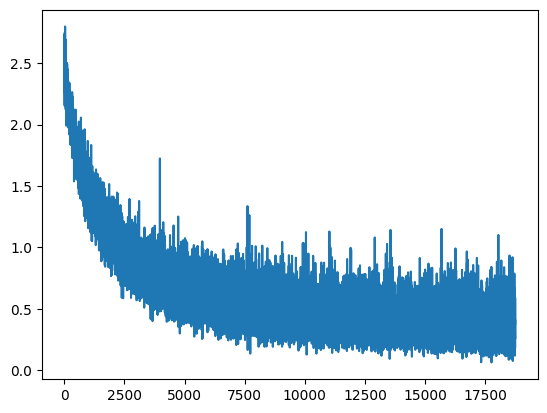

In [28]:
plt.plot(losses)

Test Accuracy: 90.41%


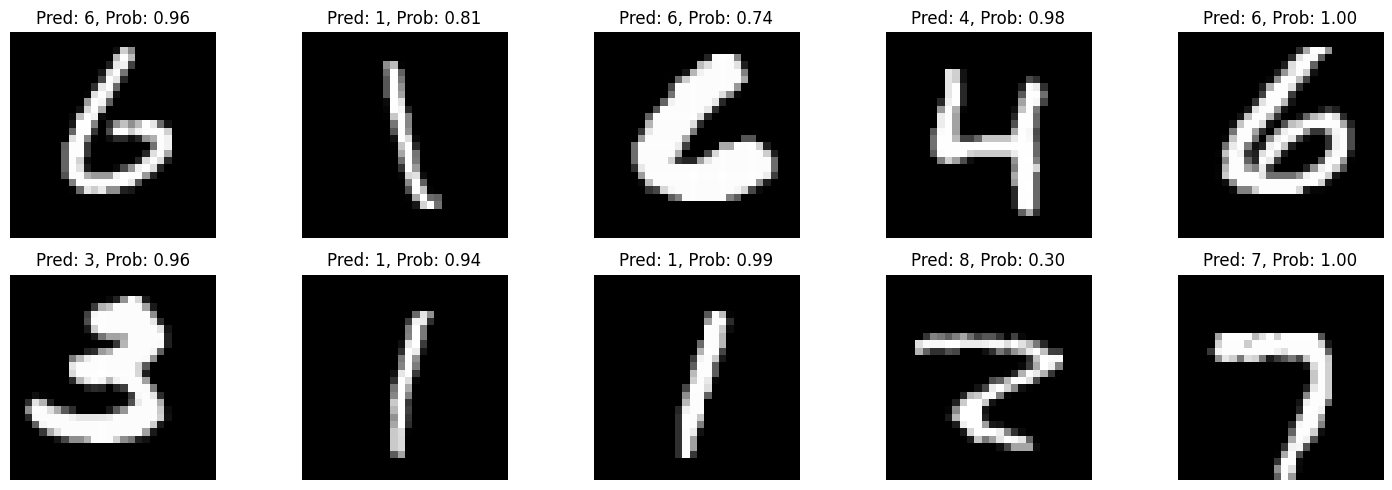

In [30]:
def compute_accuracy(model, X, y):
    predictions = model.predict(X)
    accuracy = np.mean(predictions == y)
    return accuracy

X_test_flatten = [i.reshape(-1) for i in X_test]
accuracy = compute_accuracy(model, np.array(X_test_flatten), y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

num_images = 10
indices = np.random.choice(len(X_test), num_images, replace=False)

plt.figure(figsize=(15, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    
    probabilities = model.predict_proba(X_test_flatten[idx].reshape(1, -1))
    predicted_class = np.argmax(probabilities)
    predicted_prob = probabilities[0][predicted_class]
    
    plt.title(f'Pred: {predicted_class}, Prob: {predicted_prob:.2f}')

plt.tight_layout()
plt.show()

# lab 3


Метод наискорейшего градиентного спуска:
Время выполнения: 0.2829883098602295 c
Точка минимума функции: [0.53419238 0.21465105]
Минимум функции: 18.584868017063343
Количество итераций: 10000

Метод Флетчера-Ривза:
Время выполнения: 0.43068957328796387 c
Точка минимума функции: [0.99999954 0.99999907]
Минимум функции: 15.000000000001068
Количество итераций: 10000

Метод Полака-Рибьера:
Время выполнения: 0.00021004676818847656 c
Точка минимума функции: [1. 1.]
Минимум функции: 15.0
Количество итераций: 1

Метод Девидона-Флетчера-Пауэлла:
Время выполнения: 0.00010514259338378906 c
Точка минимума функции: [1. 1.]
Минимум функции: 15.0
Количество итераций: 0

Метод Левенберга-Марквардта:
Время выполнения: 0.6038262844085693 c
Точка минимума функции: [0.99858574 0.99716523]
Минимум функции: 15.000010034677913
Количество итераций: 10000


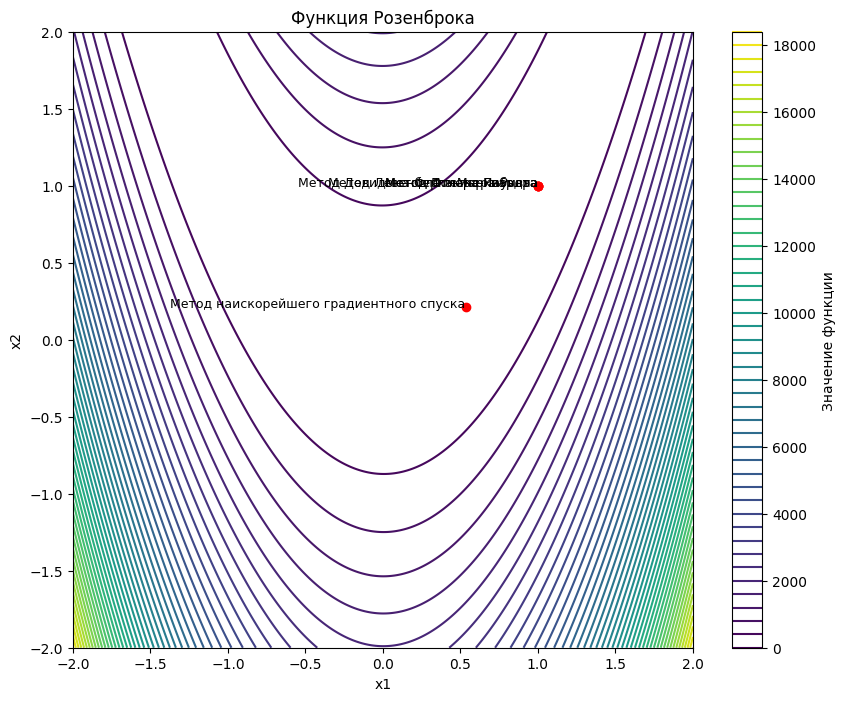

In [19]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Функция Розенброка
def F(x):
    a, b, f0 = 500, 5, 15
    return a * (x[0]**2 - x[1])**2 + b * (x[0] - 1)**2 + f0

# Градиент функции Розенброка
def dF(x):
    a, b = 500, 5
    return np.array([2 * a * (x[0]**2 - x[1]) * 2 * x[0] + 2 * b * (x[0] - 1), -2 * a * (x[0]**2 - x[1])])

# Метод наискорейшего градиентного спуска
def gradient_descent(func, grad_func, x0, eps1=1e-6, eps2=1e-16, max_iters=10000):
    alpha = 0.001  # Уменьшенный шаг
    x = x0
    iter = 0
    second_time = False
    for i in range(max_iters):
        grad = grad_func(x)
        if np.any(np.isnan(grad)):
            break
        prev_x = x.copy()
        x -= alpha * grad
        if np.linalg.norm(x - prev_x) < eps1 and abs(func(x) - func(prev_x)) < eps2:
            if second_time:
                break
            else:
                second_time = True
        else:
            second_time = False
        iter += 1
    return x, iter

# Метод Флетчера-Ривза
def fletcher_reeves(func, grad_func, x0, eps1=1e-6, eps2=1e-16, max_iters=10000):
    alpha = 1e-6  # Сниженный шаг
    x = x0
    d = -grad_func(x)
    grad_prev = grad_func(x)
    iter = 0
    second_time = False
    for i in range(max_iters):
        grad = grad_func(x)
        if np.any(np.isnan(grad)):
            break
        prev_x = x.copy()
        x += alpha * d
        if np.linalg.norm(x - prev_x) < eps1 and abs(func(x) - func(prev_x)) < eps2:
            if second_time:
                break
            else:
                second_time = True
        else:
            second_time = False
        grad_new = grad_func(x)
        denominator = np.dot(grad_prev, grad_prev)
        if denominator == 0:
            beta = 0
        else:
            beta = np.dot(grad_new, grad_new) / denominator
        d = -grad_new + beta * d
        grad_prev = grad_new
        iter += 1
    return x, iter

# Метод Полака-Рибьера
def polak_ribiere(func, grad_func, x0, eps1=1e-6, eps2=1e-16, max_iters=10000):
    alpha = 1e-6  # Сниженный шаг
    x = x0
    grad_prev = grad_func(x)
    d = -grad_prev
    iter = 0
    second_time = False
    step_count = 0  # Счетчик шагов

    for i in range(max_iters):
        grad = grad_func(x)
        if np.any(np.isnan(grad)):
            break
        prev_x = x.copy()
        x += alpha * d
        if np.linalg.norm(x - prev_x) < eps1 and abs(func(x) - func(prev_x)) < eps2:
            if second_time:
                break
            else:
                second_time = True
        else:
            second_time = False
        grad_new = grad_func(x)
        y = grad_new - grad_prev
        denominator = np.dot(grad_prev, grad_prev)
        if denominator == 0:
            beta = 0
        else:
            beta = np.dot(grad_new, y) / denominator
        d = -grad_new + beta * d
        grad_prev = grad_new
        iter += 1
        step_count += 1

        # Перезапуск алгоритма каждые два шага
        if step_count == 2:
            step_count = 0  # Сброс счетчика шагов
            x0 = x  # Принять текущую точку как начальную
            grad_prev = grad_func(x0)
            d = -grad_prev
            second_time = False

    return x, iter

# Метод Девидона-Флетчера-Пауэлла
def dfp_method(func, grad_func, x0, eps1=1e-6, eps2=1e-16, max_iters=20000):
    n = len(x0)
    H = np.eye(n)
    x = x0
    iter = 0
    for i in range(max_iters):
        grad = grad_func(x)
        if np.any(np.isnan(grad)):
            break
        p = -np.dot(H, grad)
        alpha = 0.01  # Уменьшенный шаг
        prev_x = x.copy()
        x += alpha * p
        if np.linalg.norm(x - prev_x) < eps1 and abs(func(x) - func(prev_x)) < eps2:
            break
        s = alpha * p
        y = grad_func(x) - grad
        A = np.outer(s, s) / np.dot(s, y)
        B = np.dot(np.dot(np.dot(H, y), y.T), H) / np.dot(y.T, np.dot(H, y))
        H += A - B
        iter += 1
    return x, iter

# Метод Левенберга-Марквардта
def levenberg_marquardt(func, grad_func, x0, eps1=1e-6, eps2=1e-16, max_iters=10000):
    def jacobian(x):
        a, b = 500, 5
        return np.array([[2 * a * (x[0]**2 - x[1]) * 2 * x[0] + 2 * b * (x[0] - 1), -2 * a * (x[0]**2 - x[1])]])
    n = len(x0)
    x = x0
    alpha = 1
    iter = 0
    for i in range(max_iters):
        grad = grad_func(x)
        if np.any(np.isnan(grad)):
            break
        jac = jacobian(x)
        hessian = np.dot(jac.T, jac) + alpha * np.eye(n)
        try:
            step = np.linalg.solve(hessian, -grad)
        except np.linalg.LinAlgError:
            break
        new_x = x + step
        if np.linalg.norm(step) < eps1 and abs(func(x) - func(new_x)) < eps2:
            break
        if func(new_x) < func(x):
            alpha /= 2
            x = new_x
        else:
            alpha *= 2
        iter += 1
    return x, iter

# Запуск методов и сравнение времени выполнения
methods = [
    {'name': "Метод наискорейшего градиентного спуска", 'func': gradient_descent, 'x0': np.array([0.0, 0.0])},
    {'name': "Метод Флетчера-Ривза", 'func': fletcher_reeves, 'x0': np.array([2.0, 0.0])},
    {'name': "Метод Полака-Рибьера", 'func': polak_ribiere, 'x0': np.array([1.0, 1.0])},
    {'name': "Метод Девидона-Флетчера-Пауэлла", 'func': dfp_method, 'x0': np.array([1.0, 1.0])},
    {'name': "Метод Левенберга-Марквардта", 'func': levenberg_marquardt, 'x0': np.array([0.0, 0.0])}
]

for method in methods:
    start_time = time.time()
    print(f"\n{method['name']}:")
    result, iterations = method['func'](F, dF, method['x0'])
    print("Время выполнения:", time.time() - start_time, "c")
    print("Точка минимума функции:", result)
    print("Минимум функции:", F(result))
    print("Количество итераций:", iterations)

# Построение графиков
xs = np.linspace(-2, 2, 400)
ys = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(xs, ys)
Z = np.array([[F([x, y]) for x in xs] for y in ys])

plt.figure(figsize=(10, 8))
plt.contour(X, Y, Z, levels=50, cmap='viridis')
plt.colorbar(label='Значение функции')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Функция Розенброка')

for method in methods:
    result, _ = method['func'](F, dF, method['x0'])
    plt.plot(result[0], result[1], 'ro')
    plt.text(result[0], result[1], method['name'], fontsize=9, ha='right')

plt.show()

# lab 4